In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

In [2]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

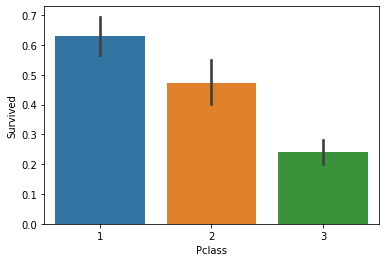

In [10]:
sns.barplot(x='Pclass', y='Survived', data=train)

In [11]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train['not_alone'].value_counts()


1    537
0    354
Name: not_alone, dtype: int64

In [12]:
train.dropna(subset=['Embarked'], inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


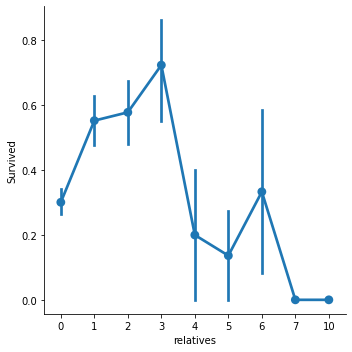

In [13]:
axes = sns.factorplot('relatives','Survived', 
                      data=train, aspect = 1, )

In [14]:
train = train.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,0,3,male,22.0,1,0,7.2500,S,1,0
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1


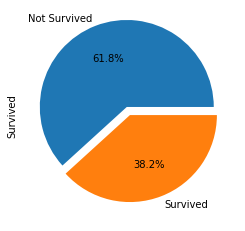

In [15]:
train.Survived.value_counts().plot.pie(labels=["Not Survived","Survived"],autopct='%1.1f%%',explode=[0.1,0.])

In [16]:
data = [train,test]
for dataset in data:
  dataset['Sex'] = dataset['Sex'].replace({"male":0,"female":1})
  dataset['Embarked'] = dataset['Embarked'].replace({"S":0,"Q":1,"C":2})
  

In [17]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,0,3,0,22.0,1,0,7.2500,0,1,0
1,1,1,1,38.0,1,0,71.2833,2,1,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,0,35.0,0,0,8.0500,0,0,1


relatives
0     535
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: relatives, dtype: int64


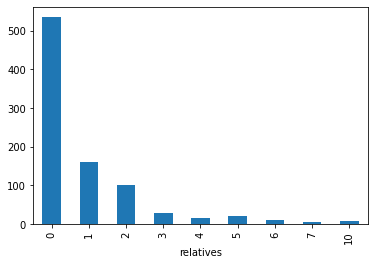

In [18]:
print(train.groupby(['relatives'])["relatives"].count())
train.groupby(['relatives'])["relatives"].count().plot(kind="bar")
plt.show()

In [19]:
mean_fare = (train.Fare.mean()+test.Fare.mean())/2
train.Fare.fillna(mean_fare, inplace=True)
test.Fare.fillna(mean_fare, inplace=True) 

mean_Age = (train.Age.mean()+test.Age.mean())/2
train.Age.fillna(mean_Age, inplace=True)
test.Age.fillna(mean_Age, inplace=True)


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   889 non-null    int64  
 1   Pclass     889 non-null    int64  
 2   Sex        889 non-null    int64  
 3   Age        889 non-null    float64
 4   SibSp      889 non-null    int64  
 5   Parch      889 non-null    int64  
 6   Fare       889 non-null    float64
 7   Embarked   889 non-null    int64  
 8   relatives  889 non-null    int64  
 9   not_alone  889 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 108.7 KB


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
 11  relatives    418 non-null    int64  
 12  not_alone    418 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 42.6+ KB


In [22]:
data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6


In [23]:
train["Age"].value_counts()

4    303
6    147
3    106
5    102
2     92
1     71
0     68
Name: Age, dtype: int64

In [24]:
data = [train, test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [25]:
train["Fare"].value_counts()

2    229
0    223
1    217
3    167
4     44
5      9
Name: Fare, dtype: int64

In [26]:
test = test.drop(['PassengerId','Name','Cabin','Ticket'],axis = 1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,3,0,5,0,0,0,1,0,1
1,3,1,6,1,0,0,0,1,0
2,2,0,6,0,0,1,1,0,1
3,3,0,3,0,0,1,0,0,1
4,3,1,2,1,1,1,0,2,0


In [28]:
data = [train, test]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,6,0
1,1,1,1,5,1,0,3,2,1,0,5,1
2,1,3,1,3,0,0,1,0,0,1,9,1
3,1,1,1,5,1,0,3,0,1,0,5,1
4,0,3,0,5,0,0,1,0,0,1,15,1
5,0,3,0,4,0,0,1,1,0,1,12,1
6,0,1,0,6,0,0,3,0,0,1,6,3
7,0,3,0,0,3,1,2,0,4,0,0,0
8,1,3,1,3,0,2,1,0,2,0,9,0
9,1,2,1,1,1,0,2,2,1,0,2,1


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Survived         889 non-null    int64
 1   Pclass           889 non-null    int64
 2   Sex              889 non-null    int64
 3   Age              889 non-null    int64
 4   SibSp            889 non-null    int64
 5   Parch            889 non-null    int64
 6   Fare             889 non-null    int64
 7   Embarked         889 non-null    int64
 8   relatives        889 non-null    int64
 9   not_alone        889 non-null    int64
 10  Age_Class        889 non-null    int64
 11  Fare_Per_Person  889 non-null    int64
dtypes: int64(12)
memory usage: 122.6 KB


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Pclass           418 non-null    int64
 1   Sex              418 non-null    int64
 2   Age              418 non-null    int64
 3   SibSp            418 non-null    int64
 4   Parch            418 non-null    int64
 5   Fare             418 non-null    int64
 6   Embarked         418 non-null    int64
 7   relatives        418 non-null    int64
 8   not_alone        418 non-null    int64
 9   Age_Class        418 non-null    int64
 10  Fare_Per_Person  418 non-null    int64
dtypes: int64(11)
memory usage: 36.0 KB


In [31]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test

In [37]:
model1 = LogisticRegression()
y_test =model1.fit(X_train, Y_train)

Y_pred1 = model1.predict(X_test)

accuracy =(model1.score(X_train, Y_train) * 100)
accuracy

80.53993250843644

In [39]:
model2 = KNeighborsClassifier(n_neighbors = 5) 
y_test2 = model2.fit(X_train, Y_train)  
Y_pred2 = model2.predict(X_test)  
accuracy1 =(model2.score(X_train, Y_train) *100)
accuracy1

82.7896512935883

In [42]:
model3 = SVC()
y_test3 = model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

accuracy2 =(model3.score(X_train, Y_train) *100)
accuracy2


82.67716535433071